### Holiday Project

### Part A: Harmonic Force on a Rocket

#### Part A, Q1 - Q4
All systems are initialized with velocity of 0m/s, else stated. Engine Harmonic force 

$$
F(t) = F_0 \cos(\omega t)
$$

where:
- $F_0 = Initial Force$
- $\omega = Angular Frequency$

In [23]:
import math

mass = 2
spring_constant = 20 
damping_constant = 5
initial_position = 10
angular_frequencies = [3, 3.162, 4.5]



In [24]:
# Force equations

# spring force
def spring_force(spring_constant, initial_position):
    return spring_constant * initial_position

# damping force
def damping_force(damper_constant, initial_position, angular_frequencies):
    d_forces = []
    for item in angular_frequencies	:
        force = damper_constant * initial_position * item
        d_forces.append(force)
    return d_forces

# due to mass
def mass_force(mass, initial_position, angular_frequencies):
    m_forces = []
    for item in angular_frequencies:
        force = mass * initial_position * (item**2)
        m_forces.append(force)
    return m_forces

# Resultant force
def resultant_force(spring_constant, damping_constant, mass, initial_position, angular_frequencies):
    resultant_forces = []
    for omega in angular_frequencies:
        term1 = (spring_constant - (mass * (omega**2)))**2
        term2 = (damping_constant * omega)**2
        force = math.sqrt(initial_position**2 * (term1 + term2))

        resultant_forces.append(force)

    return resultant_forces

# phi  
def phi(mass, initial_position, angular_frequencies):
    phi_values = []
    for item in angular_frequencies:
        numerator = damping_constant * item
        denominator = spring_constant - (item**2) * mass
        phi = math.degrees(math.atan(numerator/denominator))
        phi_values.append(phi)
    return phi_values


In [25]:
print("The spring force is : ",spring_force(spring_constant, initial_position),"N")
print("The damping force for angular frequencies 3, 3.162, 4.5 are : ",damping_force(damping_constant, initial_position, angular_frequencies),"N")
print("The mass force for angular frequencies 3, 3.162, 4.5 are : ",mass_force(mass, initial_position, angular_frequencies),"N")
print("The phi values for angular frequencies 3, 3.162, 4.5 are : ",phi(mass, initial_position, angular_frequencies),"degrees")

The spring force is :  200 N
The damping force for angular frequencies 3, 3.162, 4.5 are :  [150, 158.1, 225.0] N
The mass force for angular frequencies 3, 3.162, 4.5 are :  [180, 199.96488, 405.0] N
The phi values for angular frequencies 3, 3.162, 4.5 are :  [82.40535663140857, 89.98727243679063, -47.66300076606714] degrees


In [26]:
print("The resultant force for angular frequencies 3, 3.162, 4.5 are : ",resultant_force(spring_constant, damping_constant, mass, initial_position, angular_frequencies),"N")

The resultant force for angular frequencies 3, 3.162, 4.5 are :  [151.32745950421557, 158.10000390074126, 304.38462510448846] N


##### Part A, Q5

The system is governed by the second-order equation:

$$
m \ddot{x}  + k \dot{x} + cx = F(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $F(t) = F_0 \cos(\omega t)$

We rewrite the equation as (State Space Representation):

- $\dot{x_1} = x_2$
- $\dot{x_2} = \frac{F}{m} - \frac{k}{m}x_2 - \frac{c}{m}x_1$

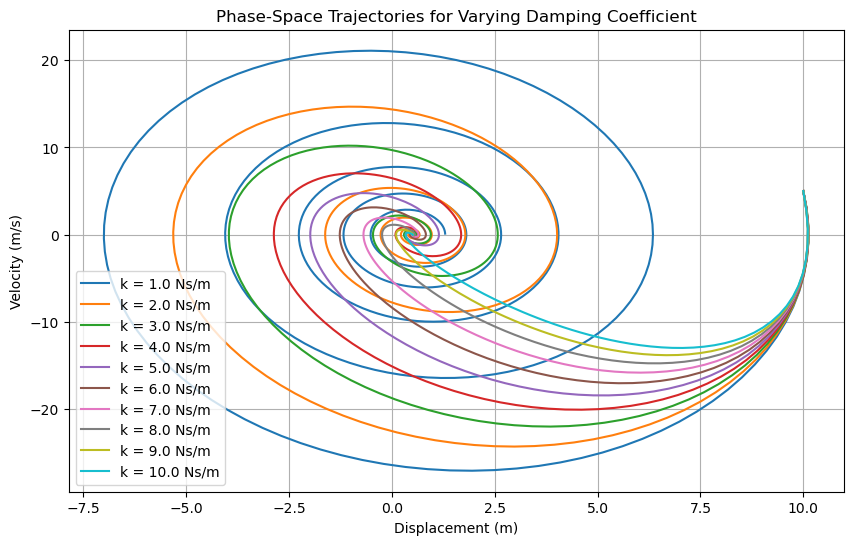

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mass = 2
spring_constant = 20
external_force = 10
initial_conditions = [10, 5] # initial displacement (x1) and velocity (x2)

def mass_spring_damper(t, x, damping_constant): 
    '''
    SSR for mass-spring-damper system
    t = time
    x = [x1, x2] = [displacement, velocity], state vectors
    k = damping constant
    '''
    x1, x2 = x
    dx1_dt = x2
    dx2_dt = external_force/mass -(damping_constant/mass)*x2 - (spring_constant/mass)*x1
    return [dx1_dt, dx2_dt]
    
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
time_span = (0, 10)
time_points = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 6))
for k in k_values:
    solution = solve_ivp(mass_spring_damper, time_span, initial_conditions, args=(k,), t_eval=time_points)

    x1 = solution.y[0] # displacement
    x2 = solution.y[1] # velocity
 
    plt.plot(x1, x2, label=f'k = {k:.1f} Ns/m')

plt.title("Phase-Space Trajectories for Varying Damping Coefficient")
plt.xlabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

##### Part A, Q6 -7

The system is given by:

$$
m \ddot{x}  + k \dot{x} + cx = F(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $F(t) = F_0 \cos(\omega t)$


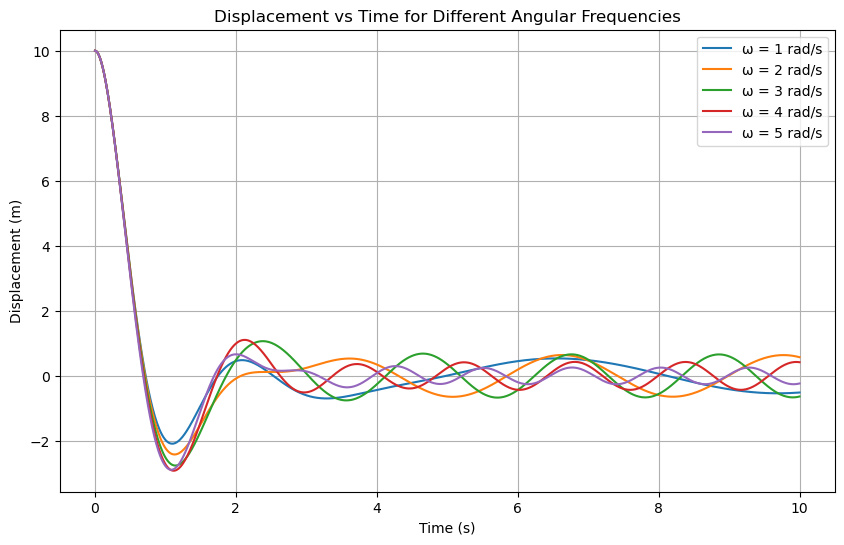

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2  
k = 5 
c = 20
F0 = 10 

def system_dynamics(t, y, omega):
    x, v = y  
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - k * v - c * x) / m
    return [dxdt, dvdt]

t_span = [0, 10] 
t_eval = np.linspace(0, 10, 1000)  

y0 = [10, 0]

frequencies = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))

for omega in frequencies:
    sol = solve_ivp(system_dynamics, t_span, y0, args=(omega,), t_eval=t_eval)
    
    plt.plot(sol.t, sol.y[0], label=f'ω = {omega} rad/s')

plt.title('Displacement vs Time for Different Angular Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()


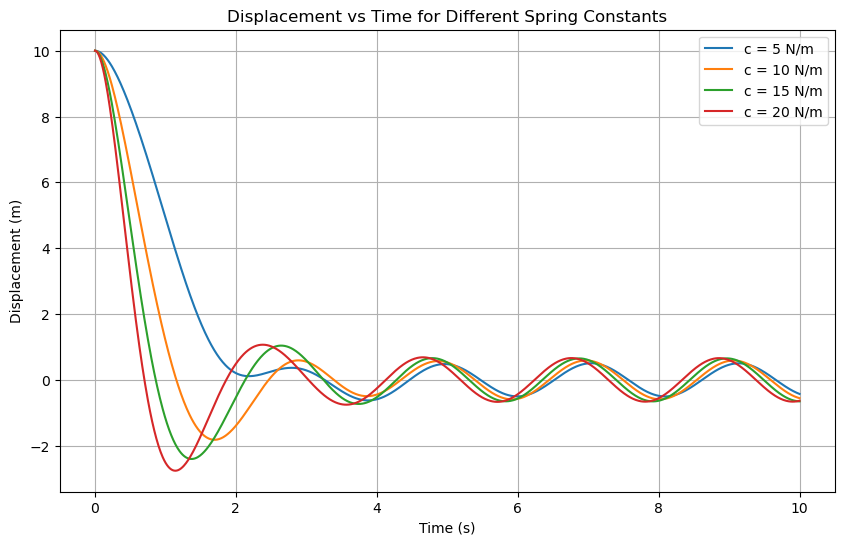

In [29]:
from scipy.integrate import odeint

mass = 2
damping_constant = 5
external_force = 10
omega = 3  
initial_displacement = 10 

t = np.linspace(0, 10, 1000)

def system_eq(X, t, mass, damping_constant, c, external_force, omega):
    x, v = X
    dxdt = v
    dvdt = (external_force * np.cos(omega * t) - k * v - c * x) / mass
    return [dxdt, dvdt]

c_values = [5, 10, 15, 20]
plt.figure(figsize=(10, 6))

for c in c_values:
    X0 = [initial_displacement, 0]
    
    sol = odeint(system_eq, X0, t, args=(mass, k, c, external_force, omega))
    
    plt.plot(t, sol[:, 0], label=f'c = {c} N/m')

plt.title('Displacement vs Time for Different Spring Constants')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()


##### Part A, Q8

In [30]:
from scipy.fft import fft, fftfreq
from scipy.integrate import solve_ivp

mass = 2 
spring_constant = 20  
damping_coeff = 5 
external_force = 10
T = 2 
omega = 2 * np.pi / T
t = np.linspace(0, 10, 1000)

square_wave = external_force * np.sign(np.sin(omega * t))

sin_wave = external_force * np.cos(omega * t)

def system(t, y, F):
    x, v = y
    a = (F(t) -damping_coeff*v -spring_constant*x)/mass
    return [v, a]

force_sin = lambda t: external_force * np.cos(omega * t)
force_square = lambda t: external_force * np.sign(np.sin(omega * t))

sol_sin = solve_ivp(system, [0, 10], [0, 0], args=(force_sin,), t_eval=t)
sol_square = solve_ivp(system, [0, 10], [0, 0], args=(force_square,), t_eval=t)

acc_sin = (sin_wave - damping_coeff * sol_sin.y[1] - spring_constant * sol_sin.y[0]) / m
acc_square = (square_wave - damping_coeff * sol_square.y[1] - spring_constant * sol_square.y[0]) / m


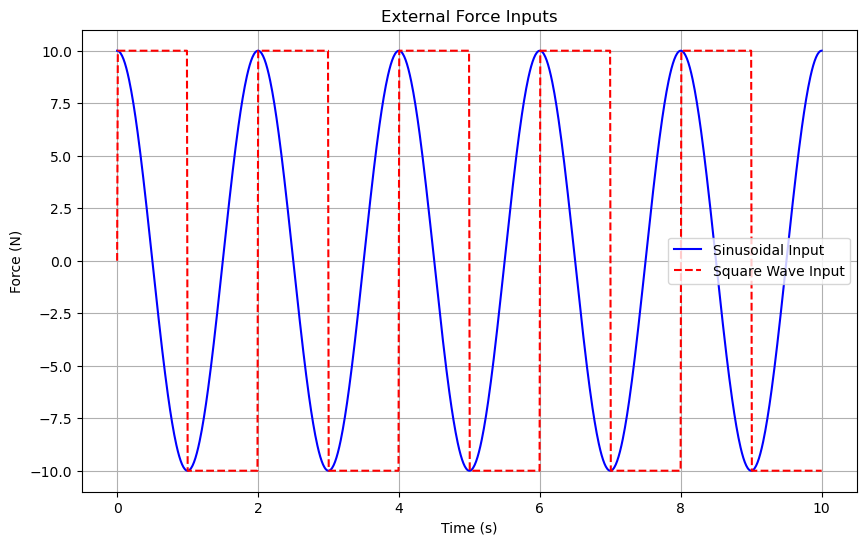

In [31]:
# plot the sin_wave and square_wave

plt.figure(figsize=(10, 6))
plt.plot(t, sin_wave, label="Sinusoidal Input", color='b')
plt.plot(t, square_wave, label="Square Wave Input", color='r', linestyle='--')
plt.title("External Force Inputs")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()
plt.show()


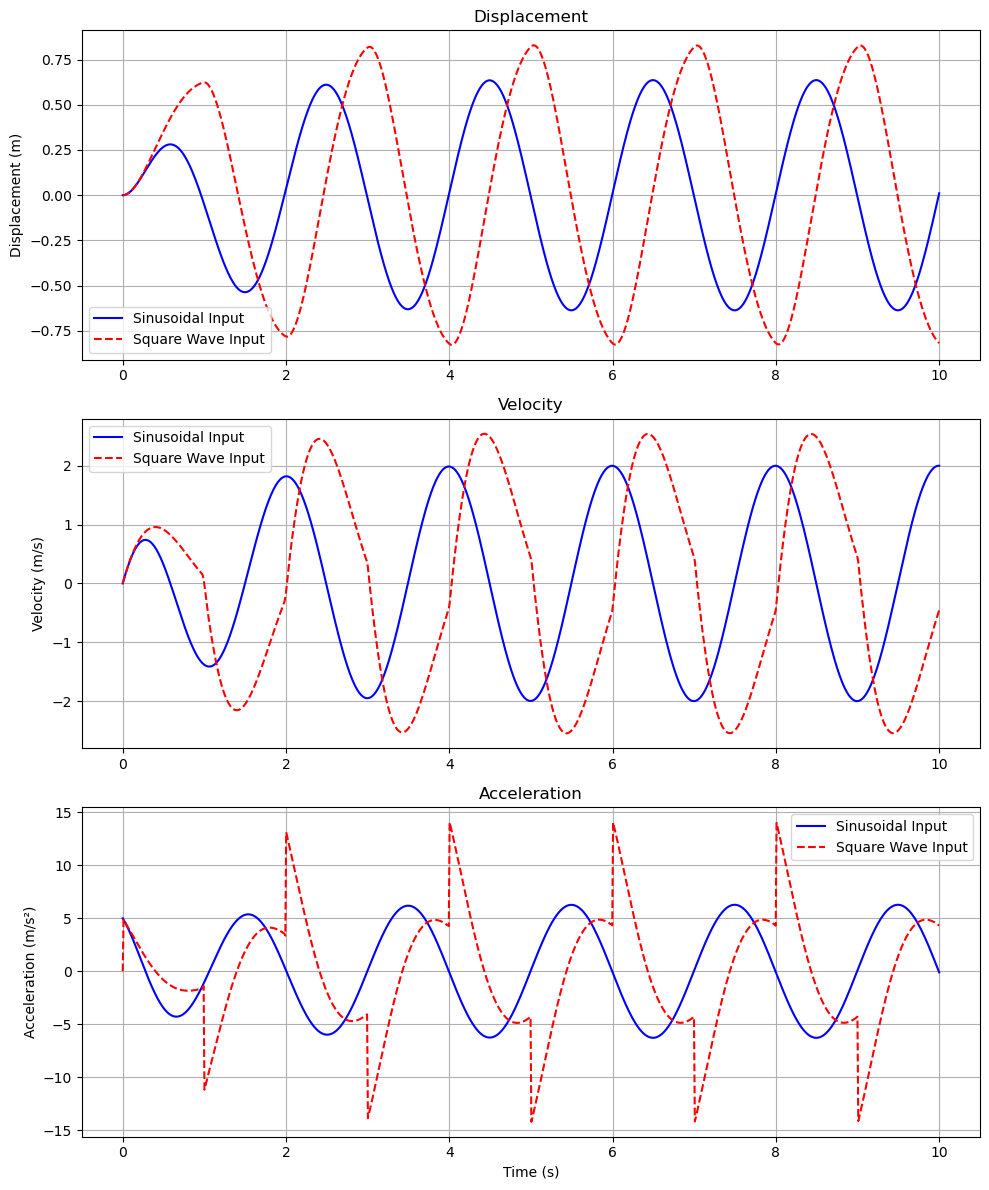

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(t, sol_sin.y[0], label="Sinusoidal Input", color='b')
axs[0].plot(t, sol_square.y[0], label="Square Wave Input", color='r', linestyle='--')
axs[0].set_title("Displacement")
axs[0].set_ylabel("Displacement (m)")
axs[0].legend()
axs[0].grid()

axs[1].plot(t, sol_sin.y[1], label="Sinusoidal Input", color='b')
axs[1].plot(t, sol_square.y[1], label="Square Wave Input", color='r', linestyle='--')
axs[1].set_title("Velocity")
axs[1].set_ylabel("Velocity (m/s)")
axs[1].legend()
axs[1].grid()

axs[2].plot(t, acc_sin, label="Sinusoidal Input", color='b')
axs[2].plot(t, acc_square, label="Square Wave Input", color='r', linestyle='--')
axs[2].set_title("Acceleration")
axs[2].set_ylabel("Acceleration (m/s²)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

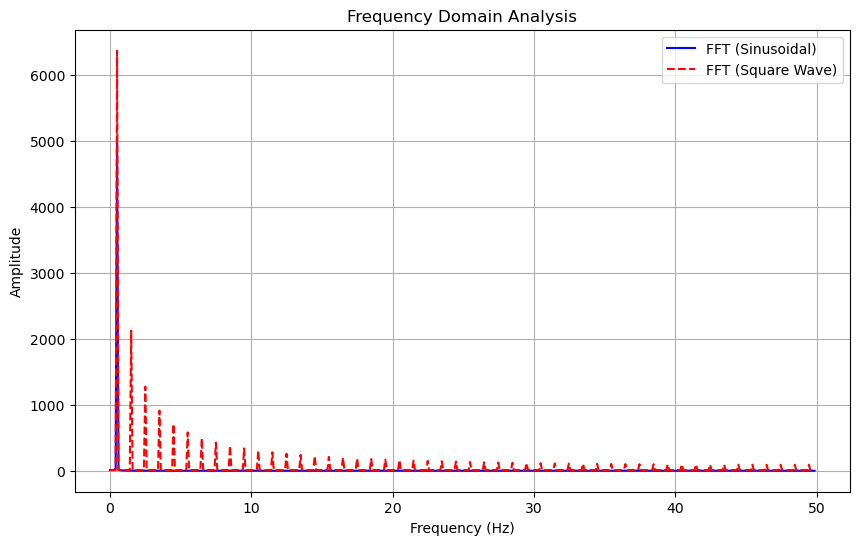

In [37]:
fft_sin = fft(sin_wave)
fft_square = fft(square_wave)
freqs = fftfreq(len(t), d=t[1] - t[0])

plt.figure(figsize=(10, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_sin[:len(freqs)//2]), label="FFT (Sinusoidal)", color='b')
plt.plot(freqs[:len(freqs)//2], np.abs(fft_square[:len(freqs)//2]), label="FFT (Square Wave)", linestyle="--", color='r')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Domain Analysis")
plt.legend()
plt.grid()
plt.show()

### Part B: Base Motion in the Rocket

##### Part B, Q2

The Rocket re-entry is modelled as:

$$
Y(t) = Y_0 cos(\omega t)
$$

Angualar Frequency is given by: 
$$
V\frac{2 \pi}{l}

$$
where:
- $V$ (speed of the rocket relative to air) = 2000m/s 
- $l$ (characteristic length scale of the disturbance caused by the turbulence) = 1000m



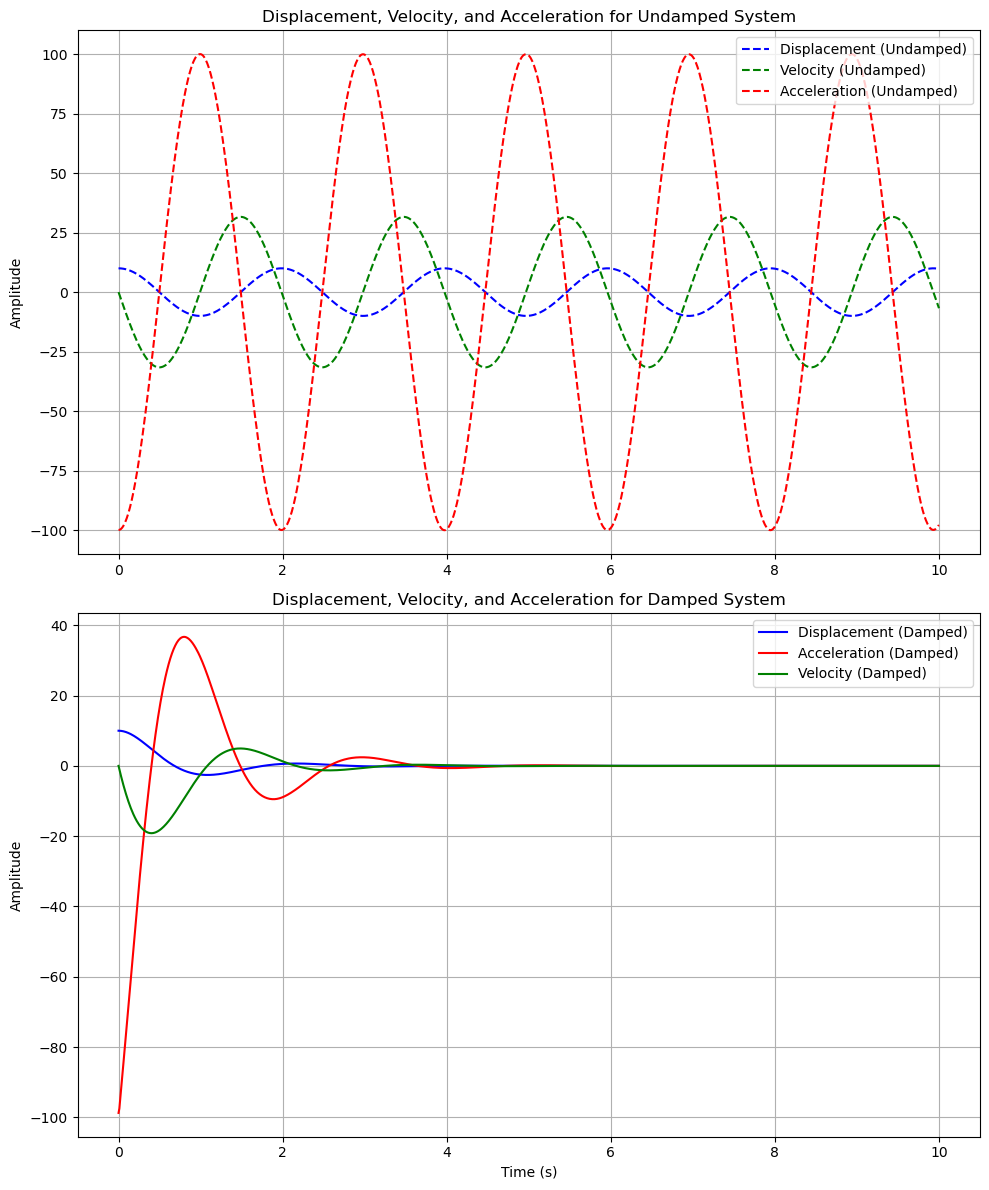

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2  
c = 20  
k_damped = 5  
k_undamped = 0  

# Time range
t_span = (0, 10)  # seconds
t_eval = np.linspace(0, 10, 1000)  # Evaluation times

def system(t, state, damping_coeff):
    x1, x2 = state  # x1 = x, x2 = dx/dt
    dx1dt = x2
    dx2dt = -(c / m) * x1 - (damping_coeff / m) * x2
    return [dx1dt, dx2dt]

def solve_system(damping_coeff):
    initial_state = [10, 0]  # x(0) = 10 m, dx/dt(0) = 0 m/s
    solution = solve_ivp(system, t_span, initial_state, t_eval=t_eval, args=(damping_coeff,))
    x = solution.y[0]
    v = solution.y[1]
    a = np.gradient(v, t_eval)  # Approximate acceleration
    return x, v, a, solution.t

x_damped, v_damped, a_damped, time = solve_system(k_damped)

x_undamped, v_undamped, a_undamped, _ = solve_system(k_undamped)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(time, x_undamped, label='Displacement (Undamped)', linestyle='--', color='blue')
axs[0].plot(time, v_undamped, label='Velocity (Undamped)', linestyle='--', color='green')
axs[0].plot(time, a_undamped, label='Acceleration (Undamped)', linestyle='--', color='red')
axs[0].set_title("Displacement, Velocity, and Acceleration for Undamped System")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].plot(time, x_damped, label='Displacement (Damped)', linestyle='-', color='blue')
axs[1].plot(time, a_damped, label='Acceleration (Damped)', linestyle='-', color='red')
axs[1].plot(time, v_damped, label='Velocity (Damped)', linestyle='-', color='green')
axs[1].set_title("Displacement, Velocity, and Acceleration for Damped System")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Time (s)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


##### Part B, Q4


Given 
- Base Excitation Force as: 
$$
y = Y_0 \cos(\omega t) \\ 

\dot{y} = -\omega Y_0 sin(\omega t) 
$$
- Angualar Frequency as: 
$$
V\frac{2 \pi}{l}
$$
Given:
- $V = 2000m/s$
- $l = 1000m$

i.e. 
$$
\omega = 12.566 rad/s
$$


The system model is given by:

$$
m \ddot{x}  + k \dot{x} + cx = y(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $y(t) = Y \cos(\omega t)$  

From Newtons Second Law,  $\sum F = ma$,  we have:

$$
m \ddot{x}  + k (\dot{x} - \dot{y}) + c(x-y) = 0  \\

m \ddot{x}  + k \dot{x} - k \dot{y} + cx-cy = 0 \\

m \ddot{x}  + k \dot{x} + cx = cy + k \dot{y} \\

$$

Substituting for $y$ and $\dot{y}$, we have:

$$
m \ddot{x}  + k \dot{x} + cx = cy \cos(\omega t) - k \omega y \sin(\omega t) \\
$$

We know that:

$$
x = X_0 \cos(\omega t - \phi) \quad \text{... eq(1)}
$$
$$
\dot{x} = -\omega X_0 \sin(\omega t - \phi) \quad \text{... eq(2)}
$$
$$
\ddot{x} = -\omega^2 X_0 \cos(\omega t - \phi) \quad \text{... eq(3)}
$$

Substituting eq(1), eq(2) and eq(3) into the system model, we have:

$$
m (-\omega^2 X_0 \cos(\omega t - \phi))  + k (-\omega X_0 \sin(\omega t - \phi)) + c(X_0 \cos(\omega t - \phi)) = cY \cos(\omega t) - k \omega Y \sin(\omega t) \\
$$

After Phasor representation, we have:

$$
F_{res1}^2 = cy^2 + Kyw^2 \\
\quad = y^2(c^2 + kw^2) \\
$$

$$
F_{res2}^2 = (kX_0 \omega)^2 + (cX_0 - mX_0\omega)^2 \\
\quad = X_0^2((k\omega)^2 + (c - m\omega^2)^2) \\
$$

Equating $F_{res1}^2$ and $F_{res2}^2$, we have:

$$
y^2(c^2 + kw^2) = X_0^2((k\omega)^2 + (c - m\omega^2)^2) \\
$$

Equations for $X_0$ and $\phi$, we have:

$$
X_0 = Y_0 \sqrt(\frac{c^2 + kw^2}{(k\omega)^2 + (c - m\omega^2)^2}) \\
$$

$$
\phi = \tan^{-1}\frac{m\omega^3k}{c^2 - m\omega^2c + k^2\omega^2} \\
$$

Solving for $X_0$ and $\phi$:

Given:
- $m = 2kg$
- $k = 5N/m$
- $c = 20Ns/m$
- $Y_0 = 150m$
- $\omega = 12.566 rad/s$

We have:

$$
X_0 = 150 \sqrt(\frac{20^2 + 5(12.566)^2}{(5(12.566))^2 + (20 - 2(12.566)^2)^2}) \\
$$

$$
\phi = \tan^{-1}\frac{2(12.566)^3(5)}{20^2 - 2(12.566)^2(20) + 5^2(12.566)^2} \\
$$

$$
X_0 = 17.115m \\
\phi = 0.219 rads/s \quad(12.531^\circ) \\
$$

##### Part B, Q5 

$$
\dot{X} = \underset{\rightarrow}{A}\vec{x} + \underset{\rightarrow}{B}\vec{y} \\
$$

Introduce the state variables:
$$
x_1 = x, \quad x_2 = \dot{x}
$$

This gives:
$$
\dot{x}_1 = x_2, \quad \dot{x}_2 = \ddot{x}
$$

From the differential equation:
$$
m\ddot{x} = -k\dot{x} - cx + k\dot{y} + cy
$$

Re-arranging for $\ddot{x}$:
$$
\dot{x}_2 = -\frac{c}{m}x_1 - \frac{k}{m}x_2 + \frac{k}{m}\dot{y} + \frac{c}{m}y
$$

Now, the state-space form becomes:
$$
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
0 & 1 \\
-\frac{c}{m} & -\frac{k}{m}
\end{bmatrix}}_{A}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\underbrace{\begin{bmatrix}
0 & 0 \\
\frac{c}{m} & \frac{k}{m}
\end{bmatrix}}_{B}
\begin{bmatrix}
y \\
\dot{y}
\end{bmatrix}
$$

Here:
- $A$ is the system matrix.
- $B$ accounts for the influence of $y(t)$ and $\dot{y}(t)$, the base motion and its velocity.


##### Part B, Q6

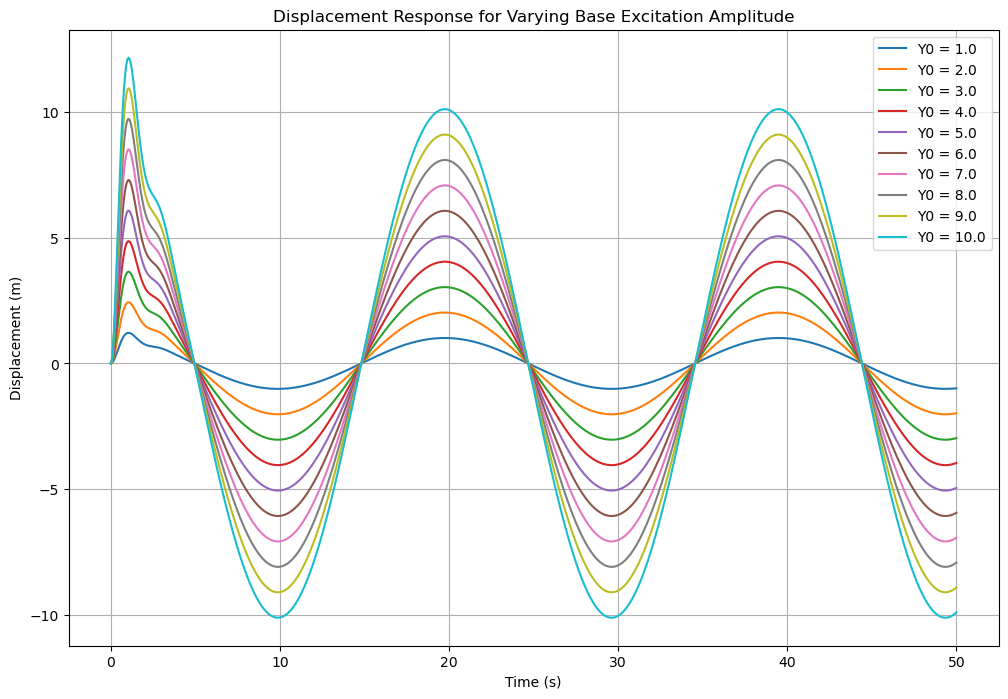

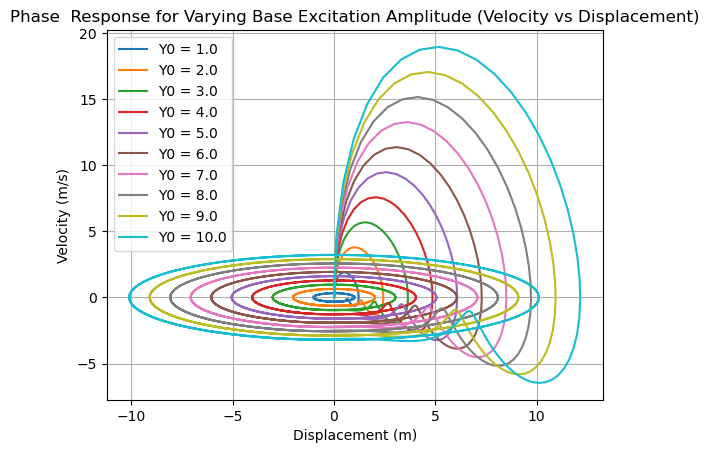

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2
c = 20 
k = 5
omega = 2000 / (2 * np.pi * 1000) 

A = np.array([[0, 1], [-c/m, -k/m]])
B = np.array([[0, 0], [c/m, k/m]])

def y(t, Y0):
    '''
    Base excitation function
    '''
    return Y0 * np.cos(omega * t)

def y_dot(t, Y0):
    '''
    Derivative of base excitation function
    '''
    return -Y0 * omega * np.sin(omega * t)

# State-space system
def state_space(t, state, Y0):
    x1, x2 = state 
    y_input = y(t, Y0)
    y_input_dot = y_dot(t, Y0)

    # Compute state derivatives
    dx1dt = x2
    dx2dt = (-c/m) * x1 - (k/m) * x2 + (c/m) * y_input + (k/m) * y_input_dot

    return [dx1dt, dx2dt]

t_span = (0, 50)  # seconds
t_eval = np.linspace(0, 50, 1000)  # Time points for evaluation

Y0_values = np.linspace(1, 10, 10)  # Base excitation amplitudes

plt.figure(figsize=(12, 8))

for Y0 in Y0_values:
    # Initial conditions: x(0) = 0, dx/dt(0) = 0
    initial_state = [0, 0]
    solution = solve_ivp(state_space, t_span, initial_state, t_eval=t_eval, args=(Y0,))
    displacement = solution.y[0]  # x1 = displacement

    plt.plot(solution.t, displacement, label=f'Y0 = {Y0:.1f}')

# Formatting the plot
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement Response for Varying Base Excitation Amplitude')
plt.legend()
plt.grid()
plt.show()

for Y0 in Y0_values:
    # Initial conditions: x(0) = 0, dx/dt(0) = 0
    initial_state = [0, 0]
    solution = solve_ivp(state_space, t_span, initial_state, t_eval=t_eval, args=(Y0,))
    displacement = solution.y[0]  # x1 = displacement

    plt.plot(displacement, solution.y[1], label=f'Y0 = {Y0:.1f}')

# Formatting the plot
plt.xlabel('Displacement (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase  Response for Varying Base Excitation Amplitude (Velocity vs Displacement)')
plt.legend()
plt.grid()
plt.show()

